In [1]:
!pip install xlrd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import random
import datetime
import statistics
import scipy
from scipy import stats


In [3]:
clients = pd.read_excel("C:\\Users\\admin\\OneDrive - Auckland Institute of Studies\\Documents\\AIS\\AI\\DataSet\\default_credit_card_clients\\default_credit_card_clients.xls")
print(len(clients))
clients.head()

30000


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
clients = clients.sort_values(by='AGE')
clients.reset_index()
print('Age range of data set: %s - %s'%(clients['AGE'].min(), clients['AGE'].max()))

Age range of data set: 21 - 79


In [6]:
clients = clients.sort_values(by='LIMIT_BAL')
clients.reset_index()
print('Limit balance index: %d - %d:'%(clients['LIMIT_BAL'].min(), clients['LIMIT_BAL'].max()))

Limit balance index: 10000 - 1000000


In [7]:
clients = clients.sort_values(by='BILL_AMT1')
clients.reset_index()
print('Bill amount 1: %d - %d'%(clients['BILL_AMT1'].min(), clients['BILL_AMT1'].max()))

Bill amount 1 -165580 - 964511:


In [8]:
clients = clients.sort_values(by='BILL_AMT2')
clients.reset_index()
print('Bill amount 2: %d - %d'%(clients['BILL_AMT2'].min(), clients['BILL_AMT2'].max()))

Bill amount 2 -69777 - 983931:


In [9]:
clients = clients.sort_values(by='BILL_AMT3')
clients.reset_index()
print('Bill amount 3: %d - %d'%(clients['BILL_AMT3'].min(), clients['BILL_AMT3'].max()))

Bill amount 3 -157264 - 1664089:


In [10]:
clients = clients.sort_values(by='BILL_AMT4')
clients.reset_index()
print('Bill amount 4: %d - %d'%(clients['BILL_AMT4'].min(), clients['BILL_AMT4'].max()))

Bill amount 4: -170000 - 891586


In [12]:
clients = clients.sort_values(by='BILL_AMT5')
clients.reset_index()
print('Bill amount 5: %d - %d'%(clients['BILL_AMT5'].min(), clients['BILL_AMT5'].max()))

Bill amount 5: -81334 - 927171


In [13]:
clients = clients.sort_values(by='BILL_AMT6')
clients.reset_index()
print('Bill amount 6: %d - %d'%(clients['BILL_AMT6'].min(), clients['BILL_AMT6'].max()))

Bill amount 6: -339603 - 961664


<Axes: title={'center': 'Distribution of Sex'}, xlabel='SEX'>

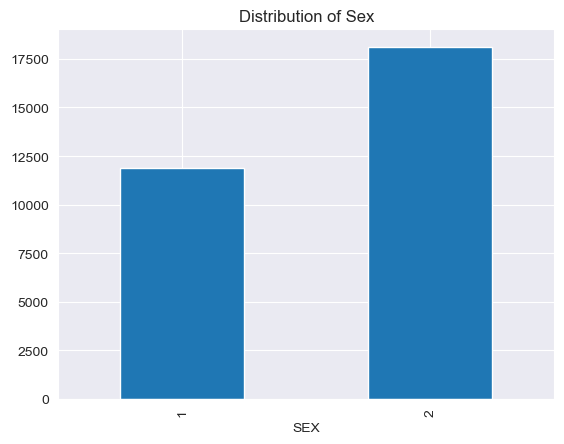

In [17]:
group_by_education = clients.groupby('SEX').size()
group_by_education.plot.bar(title="Distribution of Sex")

<Axes: title={'center': 'Distribution of Age'}, xlabel='AGE'>

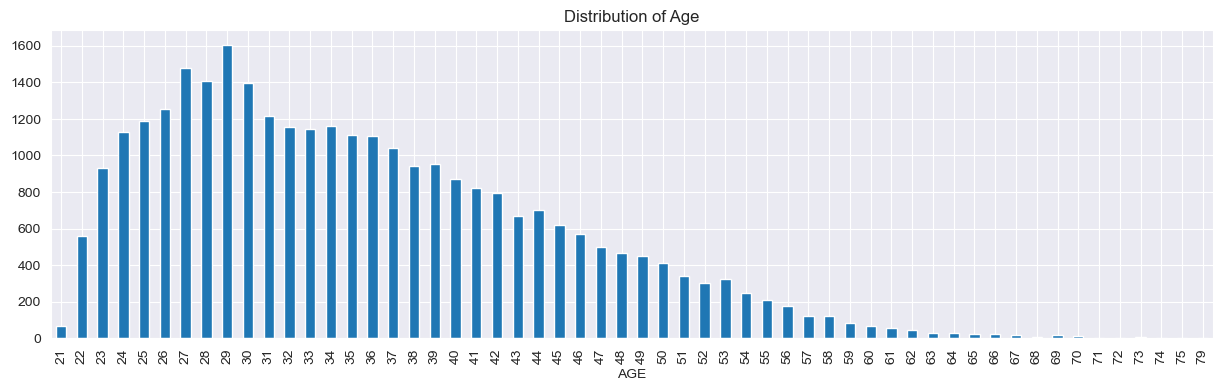

In [18]:
clients = clients.sort_values(by='AGE')
group_by_age = clients.groupby('AGE').size()
group_by_age.plot.bar(title="Distribution of Age", figsize=(15,4))

<Axes: title={'center': 'Distribution of Young'}, xlabel='DEFAULT'>

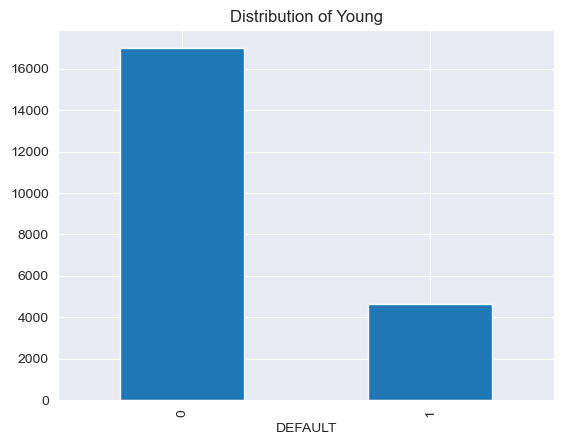

In [20]:
data_youngster = clients[(clients['AGE']>=22) & (clients['AGE']<=40)]
group_by_youngster = data_youngster.groupby('DEFAULT').size()
group_by_youngster.plot.bar(title="Distribution of Young")

<Axes: title={'center': 'Distribution of Age by Gender'}, xlabel='AGE'>

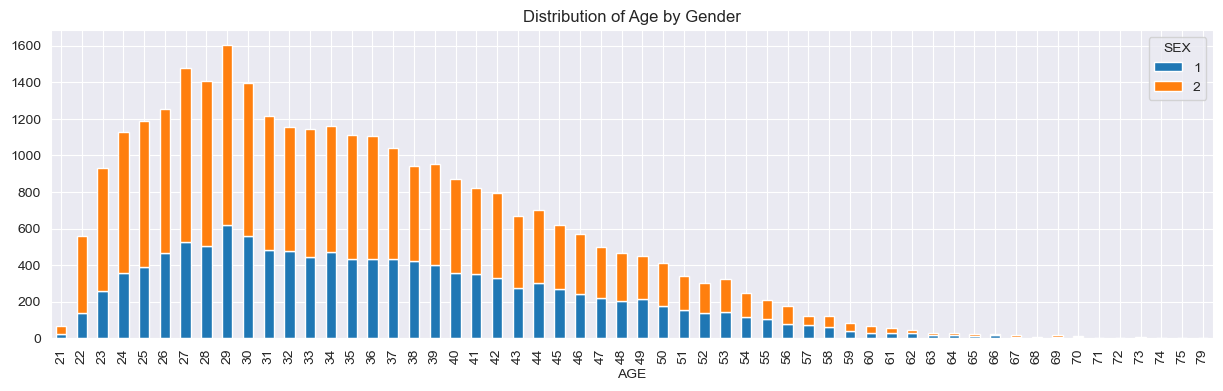

In [27]:
group_by_age_sex = clients.groupby(['AGE', 'SEX'])['AGE'].count().unstack('SEX').fillna(0)

group_by_age_sex[[1,2]].plot.bar(title='Distribution of Age by Gender', stacked=True, figsize=(15,4))